### Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno 
import datetime


In [2]:
# for interactivity 

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting the background style for the plots
plt.style.use('fivethirtyeight')

### Reading the data

In [39]:
# loading the data while checking the time taken

%time data = pd.read_csv('data-1.csv')

print(data.shape)

Wall time: 257 ms
(18207, 89)


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
pd.set_option('max_columns', 100)

data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# getting the mean, std_deviation , etc. for the numerical columns 

pd.set_option('max_columns', 100)

data.iloc[:,2:].describe().style.background_gradient(cmap = 'cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
# checking the statistical inferences for the categorical data 

data.iloc[: , 13:].describe(include = 'object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


### Cleaning the data

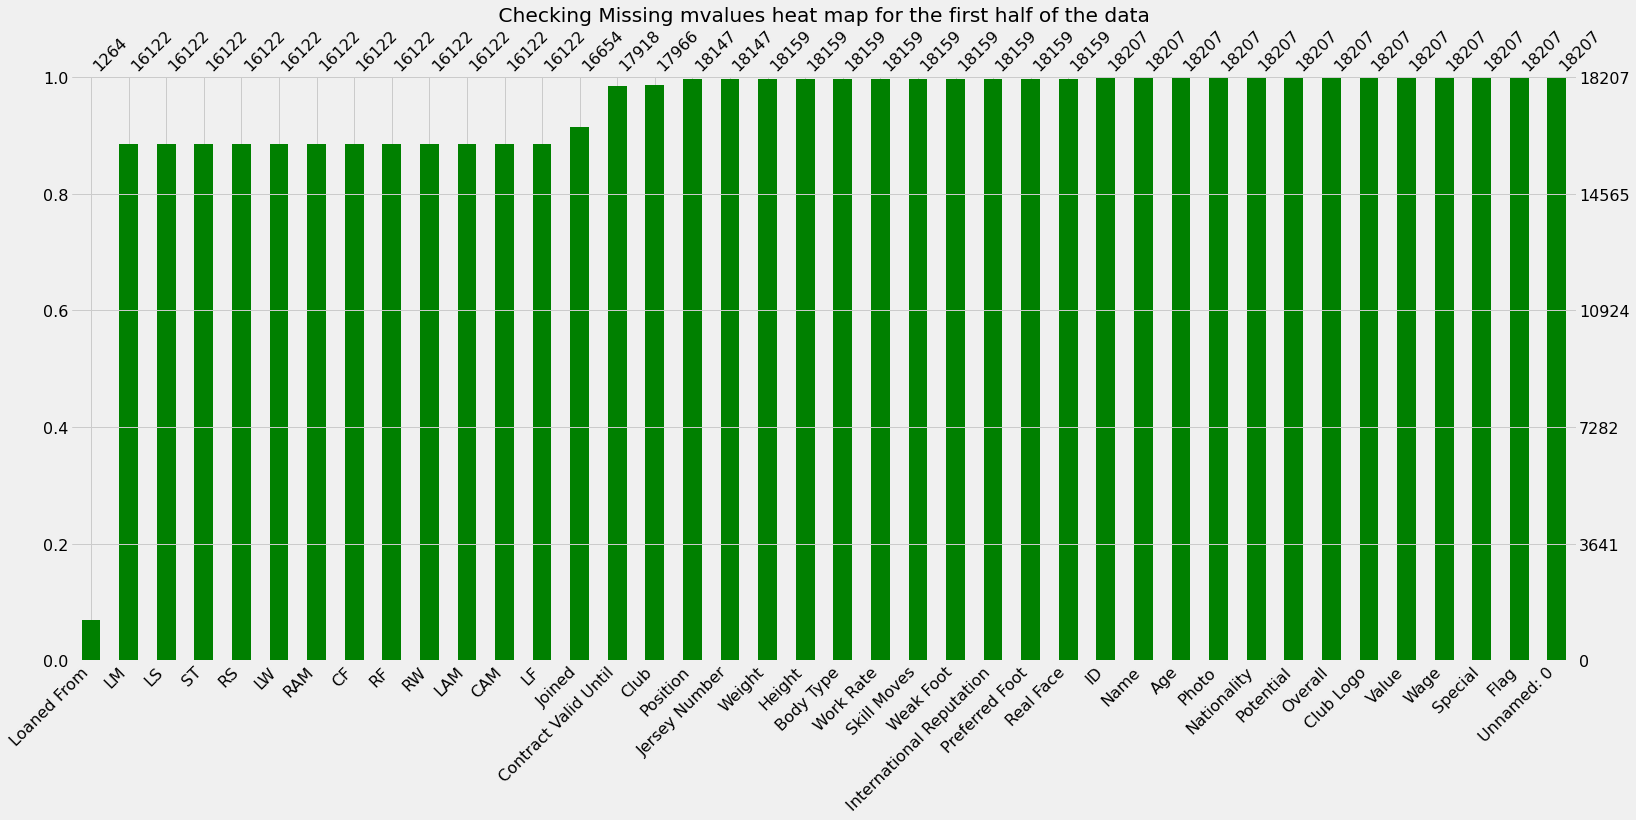

In [8]:
#visualizing the amount of missing values in the data in the firt half of the data

mno.bar(data.iloc[:, :40], color = 'green' , sort = 'ascending')

plt.title(' Checking Missing mvalues heat map for the first half of the data ')

plt.show()

### We see that loaned from has the maximum number of missing values followed by the other columns

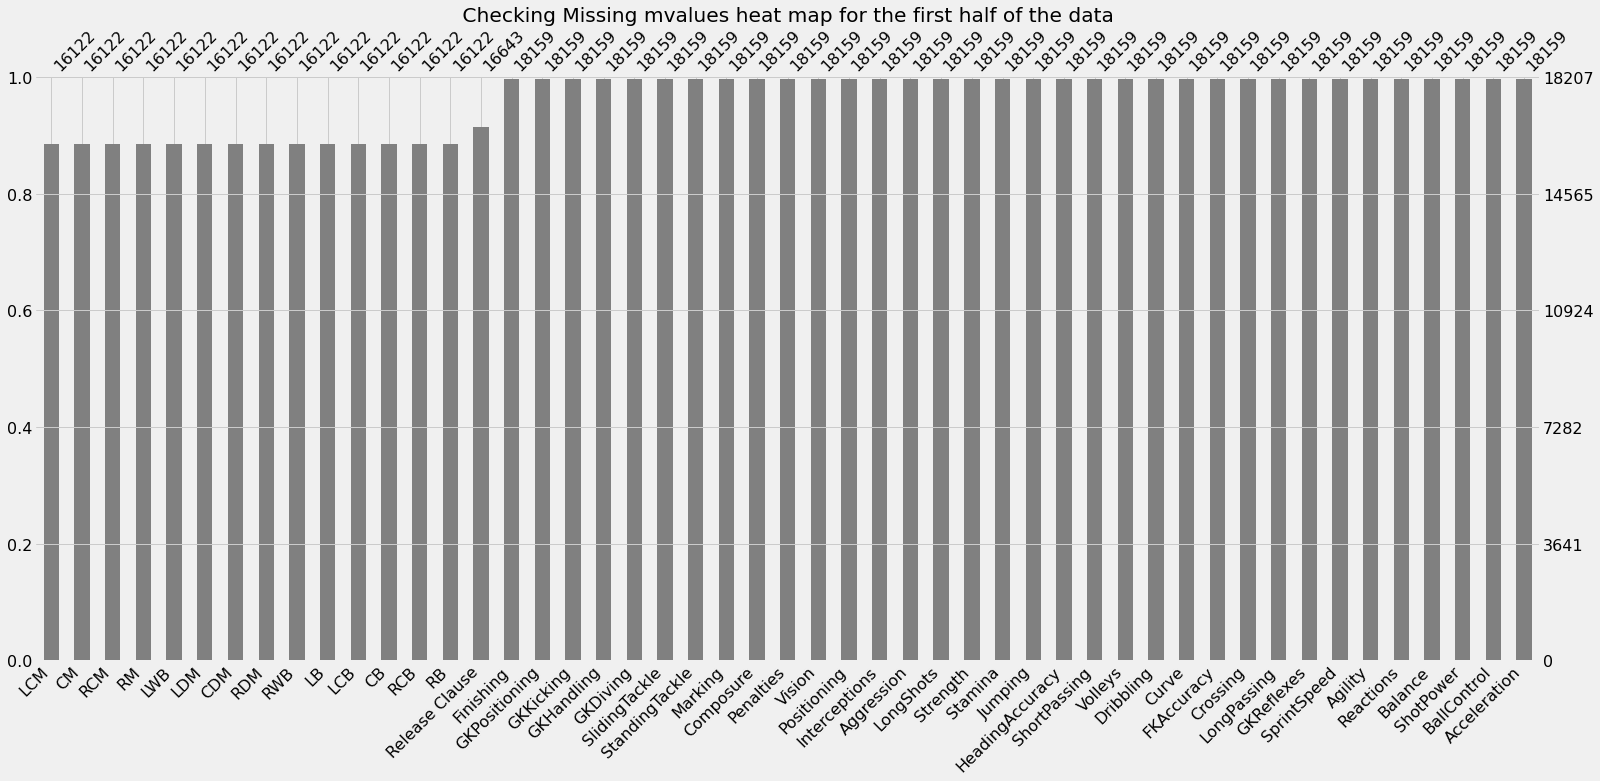

In [11]:
# visualizing the missing values in the second half of the data

mno.bar(data.iloc[:, 40:], color = 'grey' , sort = 'ascending')

plt.title(' Checking Missing mvalues heat map for the first half of the data ')

plt.show()


### Missing value imputation 

In [40]:
data['Loaned From'].fillna('None', inplace = True)

data = data.dropna()

## Feature Engineering

In [52]:
# creating new features by aggregating the existing features

def defending (data):

	return int ( round ( ( data [[ 'Marking' , 'SlidingTackle','StandingTackle']].mean()).mean() ) )


def general(data):

	return int ( round ( ( data [['HeadingAccuracy' , 'Dribbling' , 'Curve' ,'BallControl' ]].mean()).mean()))


def mental(data):

	return int ( round (( data [['Aggression' , 'Interceptions' , 'Positioning' , 'Vision' , 'Composure']].mean()).mean()))


def passing(data):

	return int ( round (( data [['Crossing' , 'ShortPassing' , 'LongPassing']].mean()).mean()))


def mobility(data):
	return int ( round (( data [['Acceleration' , 'SprintSpeed' , 'Agility', 'Reactions']].mean()).mean()))


def power(data):
	return int ( round (( data [['Balance' , 'Jumping' , 'Stamina' , 'Strength']].mean()).mean()))


def rating(data):
	return int ( round (( data [['Potential' , 'Overall']].mean()).mean()))


def shooting(data):
	return int ( round (( data [['Finishing' , 'Volleys' , 'FKAccuracy' , 'ShotPower' , 'LongShots' , 'Penalties']].mean()).mean()))




In [60]:
data ['Defending'] = data.apply(defending , axis = 1)
data ['General'] = data.apply(general , axis = 1)
data ['Mental'] = data.apply(mental , axis = 1)
data ['Passing'] = data.apply(passing , axis = 1)
data ['Mobility'] = data.apply(mobility , axis = 1)
data ['Power'] = data.apply(power , axis = 1)
data ['Rating'] = data.apply(rating , axis = 1)
data ['Shooting'] = data.apply(shooting , axis = 1)


## Data Visualization 

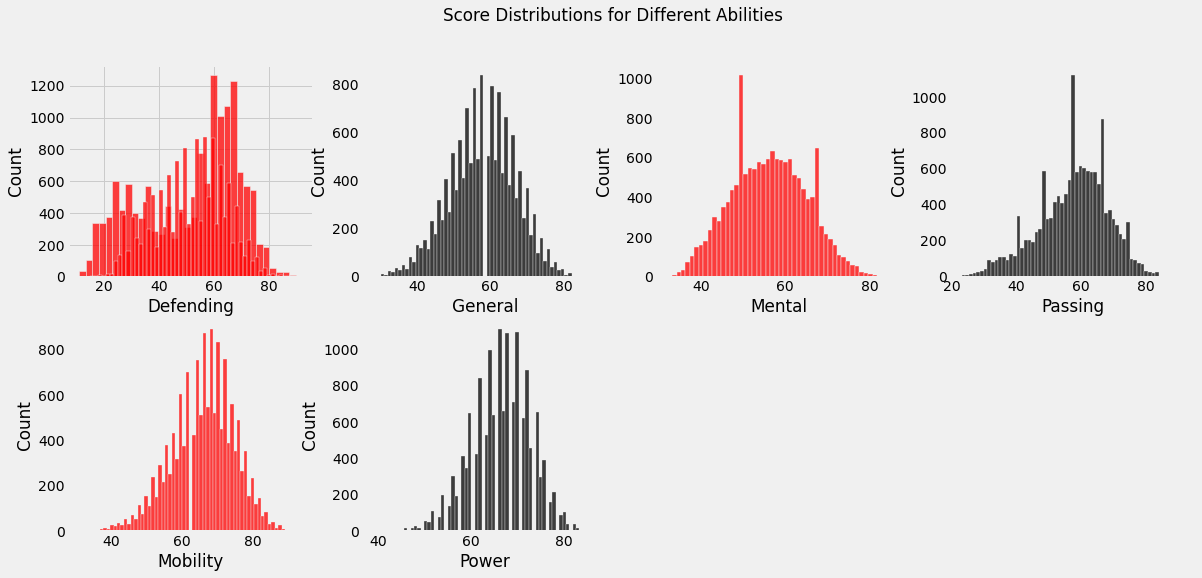

In [59]:
# Lets check the distribution of scores of different skills

plt.rcParams[ 'figure.figsize' ] = (18,8)
plt.subplot(2, 4, 1)
sns.histplot(data['Defending'], color = 'red' )
plt.grid()


plt.subplot(2, 4, 2)
sns.histplot(data['General'], color = 'black' )
plt.grid()


plt.subplot(2, 4, 3)
sns.histplot(data['Mental'], color = 'red' )
plt.grid()


plt.subplot(2, 4, 4)
sns.histplot(data['Passing'], color = 'black' )
plt.grid()


plt.subplot(2, 4, 5)
sns.histplot(data['Mobility'], color = 'red' )
plt.grid()


plt.subplot(2, 4, 6)
sns.histplot(data['Power'], color = 'black' )
plt.grid()


plt.subplot(2, 4, 1)
sns.histplot(data['Shooting'], color = 'red' )
plt.grid()


plt.suptitle('Score Distributions for Different Abilities')

plt.show()

C:\Users\rayar\anaconda3\envs\NewTry\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


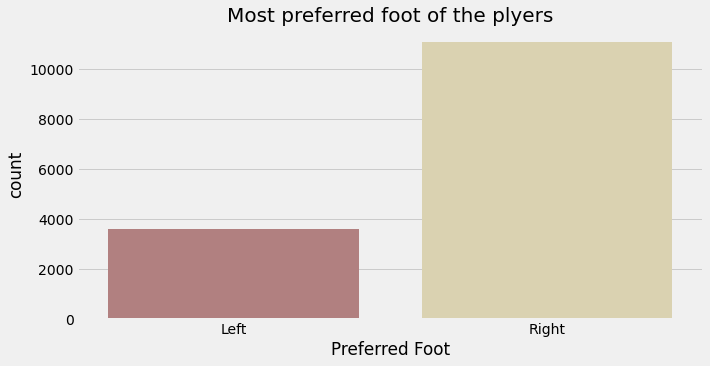

In [62]:
# comparison of preferred foot over the different players 

plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most preferred foot of the plyers' , fontsize = 20)
plt.show()

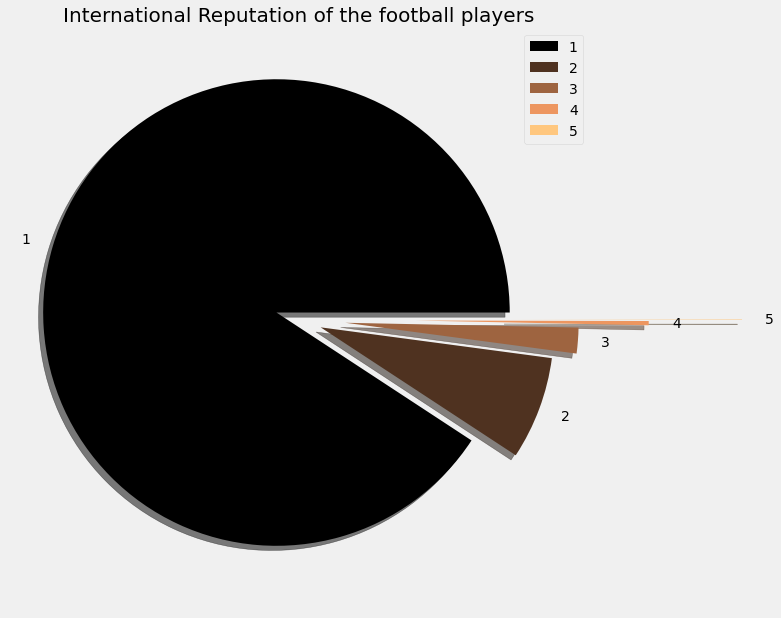

In [64]:
# plotting a pie chart to represent share of international reputation

labels = ['1' , '2' , '3' , '4' , '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace( 0, 1, 5 ))
explode = [0.1 , 0.1, 0.2, 0.5, 0.9]


plt.rcParams['figure.figsize'] = (10,10)
plt.pie(sizes,labels = labels, colors = colors, explode = explode , shadow = True)
plt.title( 'International Reputation of the football players' , fontsize = 20 )
plt.legend()
plt.show()

### There seem to be just 5 players with 5 stars international reputation rating

In [65]:
# Lets see all the players with the five stars reputation rating

data[ data['International Reputation'] == 5 ][[ 'Name' , 'Nationality' , 'Overall' ]].sort_values( by = 'Overall', ascending =False )

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
109,Z. Ibrahimović,Sweden,85


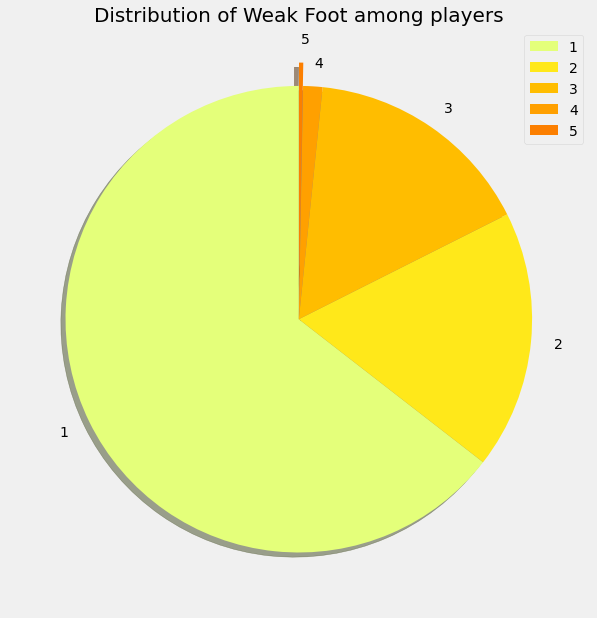

In [69]:
# plotting the pie chart to represent the share of weak foot players

labels = ['1' , '2' , '3' , '4' , '5']
sizes = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace( 0, 1, 5 ))
explode = [0 , 0, 0, 0, 0.1]


plt.pie(sizes,labels = labels, colors = colors, explode = explode , shadow = True, startangle=90)
plt.title( 'Distribution of Weak Foot among players' , fontsize = 20 )
plt.legend()
plt.show()

### Very few players have a good weak foot

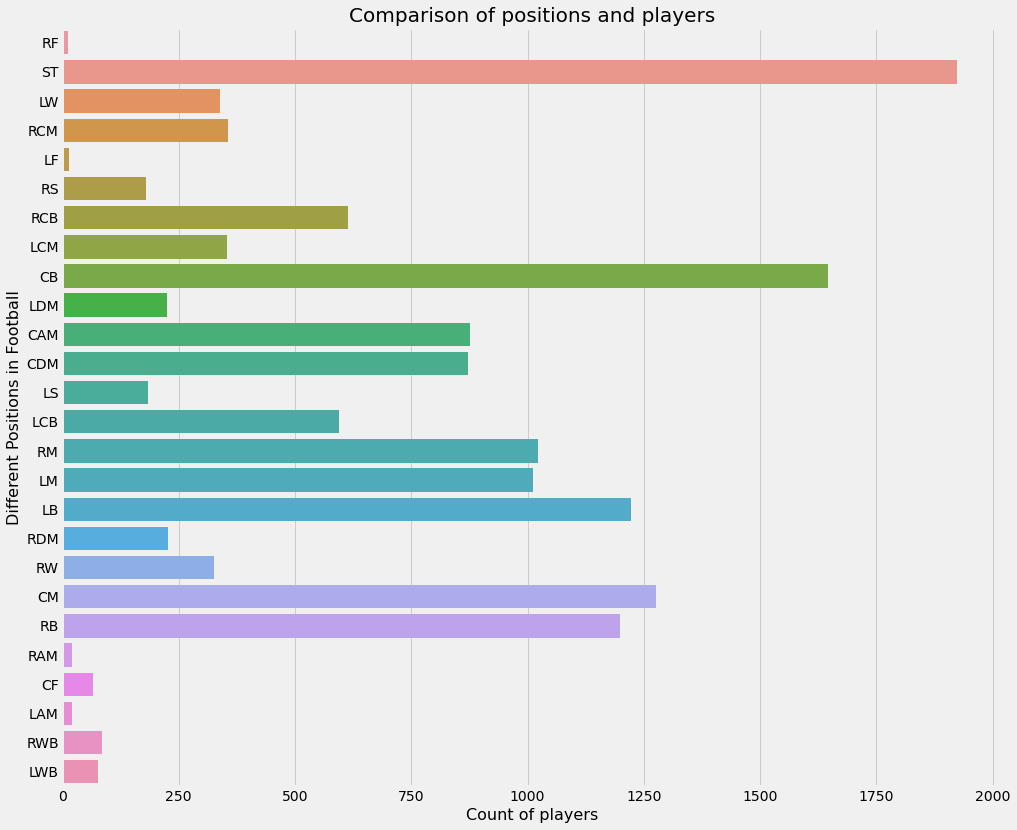

In [73]:
# positions of the players in the game


plt.figure(figsize=(15,13))
plt.style.use('fivethirtyeight')
ax = sns.countplot( y = 'Position' , data = data) #, palette= 'bone')
ax.set_ylabel(ylabel = 'Different Positions in Football', fontsize = 16)
ax.set_xlabel(xlabel = 'Count of players', fontsize = 16)
ax.set_title( label = 'Comparison of positions and players' , fontsize = 20 )
plt.show()

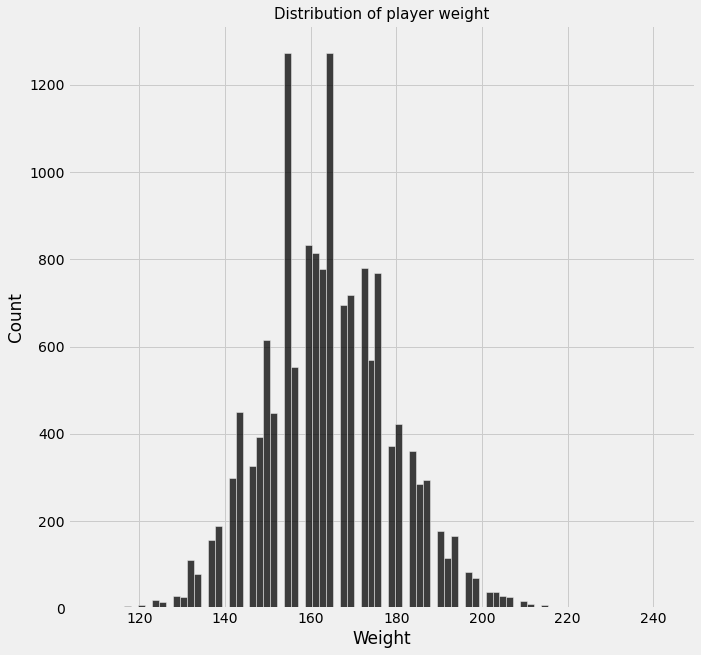

In [74]:
# defining a fucntion for cleaning the weight data

def extract_value_from(value):
	out = value.replace('lbs','')
	return float(out)

# applying the fucntion to weight columns 
data['Weight'] = data['Weight'].apply( lambda x : extract_value_from(x) )

#plotting the distributaion of weight of the players

sns.histplot(data['Weight'], color = 'black')
plt.title('Distribution of player weight' , fontsize = 15)
plt.show()

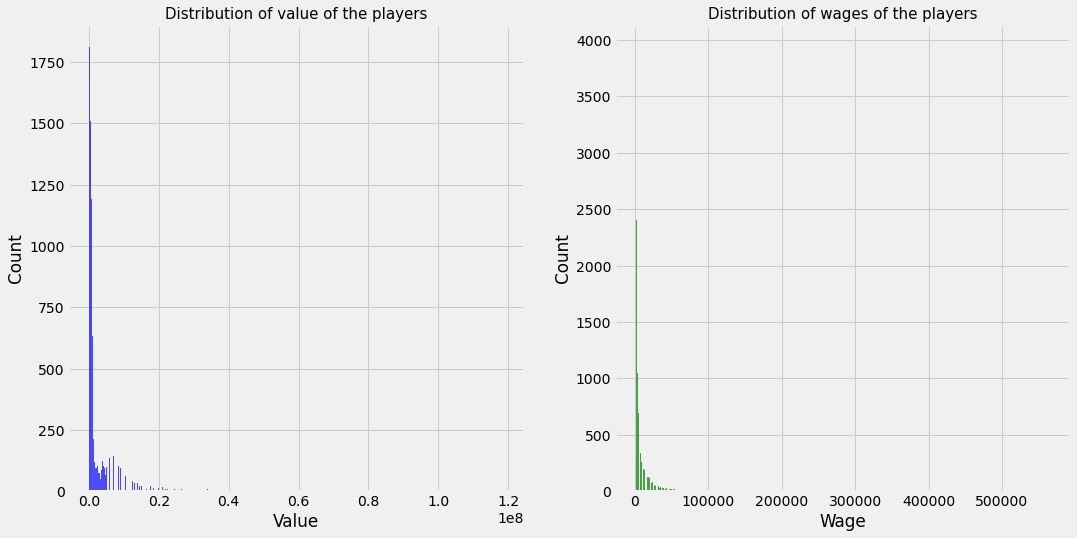

In [79]:
# defining a fucntion for cleaning the wage column

def extract_wage_from(column):

	out = column.replace('€', '' )

	if 'M' in out:
		out = float( out.replace( 'M' , '' ) )*1000000
	elif 'K' in column:
		out = float( out.replace('K',''))*1000
	
	return float(out)


# applying the fucntion to the wage and value column

# data['Value'] = data['Value'].apply(lambda x : extract_wage_from(x))
# data['Wage'] = data['Wage'].apply(lambda x : extract_wage_from(x))


# visualizing the data 

plt.rcParams['figure.figsize'] = (16,8) 

plt.subplot(1,2,1)
sns.histplot(data['Value'] , color = 'b')
plt.title('Distribution of value of the players' , fontsize = 15)


plt.subplot(1,2,2)
sns.histplot(data['Wage'] , color = 'g')
plt.title('Distribution of wages of the players' , fontsize = 15)

plt.show()